In [158]:
import pandas as pd
import sqlalchemy as sq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Connect to database

In [7]:
engine = sq.create_engine('sqlite:///OKC_Processed_DB.db') #create connection to the database

# Get tables

In [107]:
df_num = pd.read_sql_table('numerical_attributes',engine)
df_rsp = pd.read_sql_table('question_responses',engine)
df_att = pd.read_sql_table('attributes_preferences',engine)
df_tst = pd.read_sql_table('test_responses',engine)
df_key0 = pd.read_sql_table('questions_key',engine)
df_key = df_key0[df_key0.loc[:,'N']>=31548]

# Helper Functions

This function takes a dataframe and a string, and returns a new dataframe with all columns with headers that begin with that string

In [12]:
def get_columns(df,key):
    headers_all = list(df.columns)
    headers = [name for name in headers_all if name[0:len(key)]==key]
    return df.loc[:,headers]
#Example
get_columns(df_num,'d_').tail()

,d_income,d_age
68366,None,48
68367,None,32
68368,None,24
68369,None,33
68370,None,49


This function takes a question key table + a question key, and return the question associated with the key

In [18]:
def get_question(df,key):
    return df.loc[df.iloc[:,0]==key,:]
#Example
get_question(df_key,'q145537')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
2615,q145537,Are you into BDSM? are you a dom or sub,Yes! dom,"No, its wierd.",maybe with the right person and comfort level,Yes! sub,148,O,"2, 3, (1, 4)",sex/intimacy; BDSM


This function takes a keyword and searches for questions that contain such keyword in the question text

In [62]:
def search_questions(df,key):
    indexlist = []
    key = str.upper(key)
    df.fillna(value=0,inplace=True)
    for i in range(len(df_key.iloc[:,1])):
        if key in str.upper(str(df_key.iloc[i,1])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,2])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,3])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,4])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,5])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,6])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,7])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,8])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,9])):
            indexlist.append(i)
    return df_key.iloc[indexlist,:]
#Example
search_questions(df_key,'democrat')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
1381,q227646,How do you describe yourself politically?,As a Republican,As a Democrat,As a an Independent/Something Else,None of these / I'm not American,12240,N,0,politics; descriptive
1429,q166,"Politically, which way do you lean?",To the right (republican in the US),To the left (democrat in the US),To the middle / I don't know,0,11714,O,"1, 3, 2",politics


# Modelling

Make a giant-ass matrix with y as column1 and features as rest of the columns

In [208]:
df_all = pd.concat([pd.to_numeric(df_num.CA),df_rsp,df_att],axis=1)
df_all = df_all[pd.notnull(df_all['CA'])]

In [209]:
df_all.head()

,CA,"q16053_Hesitant, but I'd certainly consider it.",q16053_I'm not interested in meeting in person.,q16053_Totally willing!,q501_No,q501_Yes,q9688_No,q9688_Yes,"q9688_Yes, but only soft stuff like marijuana",q358077_No,...,d_job_Student,d_job_Technology,d_education_phase_Dropped out of,d_education_phase_Graduated from,d_education_phase_Working on,d_astrology_seriosity_and it's fun to think about,d_astrology_seriosity_but it doesn't matter,d_religion_seriosity_and laughing about it,d_religion_seriosity_and very serious about it,d_offspring_current_-
0,0.571283,1,0,0,1,0,1,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.012264,0,0,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.418364,0,0,1,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.191211,0,0,1,1,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.418364,0,0,1,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


(array([    34.,    316.,   2537.,   4076.,   8135.,   9871.,  12340.,
         10481.,   7253.,   1555.]),
 array([-3.58702023, -3.0038059 , -2.42059157, -1.83737724, -1.25416291,
        -0.67094858, -0.08773425,  0.49548008,  1.07869441,  1.66190874,
         2.24512307]),
 <a list of 10 Patch objects>)

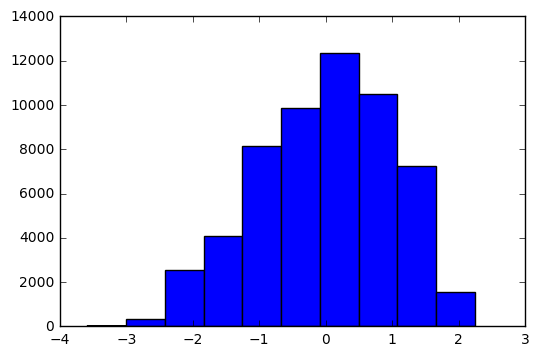

In [210]:
plt.hist(df_all.CA)

In [212]:
bins = [-10, -1, 0, 1, 10]
groups = ['supa dum', 'dum', 'smaht', 'supa smaht']
y = pd.cut(df_all['CA'], bins, labels=groups)
X = df_all.iloc[:,1:]
